In [1]:
#%tensorflow_version 2.x
import tensorflow


In [2]:
print(tensorflow.__version__)

2.1.0


In [3]:
# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
import h5py
import numpy as np

In [5]:
h5f=h5py.File('D:\Python_Files_Data\Data for Python\GreatLearning Course Material\Introduction to NN and DL\Project\SVHN_single_grey1.h5','r')

In [6]:
x_train=h5f['X_train'][:]
y_train=h5f['y_train'][:]
x_test=h5f['X_test'][:]
y_test=h5f['y_test'][:]

In [7]:
h5f.close()

In [8]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)




(42000, 32, 32)
(18000, 32, 32)
(42000,)
(18000,)


Label: 7


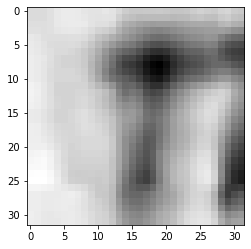

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(x_train[3000], cmap='gray')

print("Label: {}".format(y_train[3000]))


In [10]:
x_train = x_train.reshape(42000, 1024)
print(x_train.shape)
x_test = x_test.reshape(18000, 1024)
print(x_test.shape)

(42000, 1024)
(18000, 1024)


In [11]:
print(x_train.max())
print(x_train.min())

x_train = x_train / 255.0
x_test = x_test / 255.0

print(x_train.max())
print(x_train.min())


254.9745
0.0
0.9999
0.0


In [12]:
print(y_train[10])
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes=10)
print(y_train[10])

1
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


label for each of the below image: 2
label for each of the below image: 6
label for each of the below image: 7
label for each of the below image: 4
label for each of the below image: 4
label for each of the below image: 0
label for each of the below image: 3
label for each of the below image: 0
label for each of the below image: 7
label for each of the below image: 3


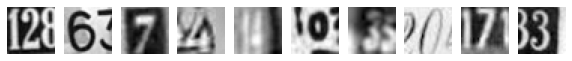

In [13]:
import numpy as np

# visualizing the first 10 images in the dataset and their labels
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_train[i].reshape(32,32), cmap="gray")
    plt.axis('off')
    print('label for each of the below image: %s' % (np.argmax(y_train[0:10][i])))
plt.show()


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers, optimizers


## hyperparameters
iterations = 100
learning_rate = 0.01
hidden_nodes = 512
output_nodes = 10
Lambda=0
        
model = Sequential()
model.add(Dense(hidden_nodes, input_shape=(1024,), activation='relu'))
model.add(Dense(hidden_nodes, activation='relu'))
model.add(Dense(output_nodes, activation='softmax', kernel_regularizer=regularizers.l2(Lambda)))
    
sgd = optimizers.SGD(lr=learning_rate, decay=1e-6, momentum=0.9)
    # Compile model
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    
    # Fit the model
model.fit(x_train, y_train, epochs=iterations, batch_size=1000, verbose= 1,validation_split=0.3)

Train on 29399 samples, validate on 12601 samples
Epoch 1/100
29399/29399 [==============================] - 4s 121us/sample - loss: 2.3001 - accuracy: 0.1122 - val_loss: 2.2884 - val_accuracy: 0.1245
Epoch 2/100
29399/29399 [==============================] - 2s 54us/sample - loss: 2.2776 - accuracy: 0.1576 - val_loss: 2.2710 - val_accuracy: 0.1578
Epoch 3/100
29399/29399 [==============================] - 1s 49us/sample - loss: 2.2579 - accuracy: 0.1934 - val_loss: 2.2527 - val_accuracy: 0.1972
Epoch 4/100
29399/29399 [==============================] - 1s 48us/sample - loss: 2.2311 - accuracy: 0.2471 - val_loss: 2.2176 - val_accuracy: 0.2699
Epoch 5/100
29399/29399 [==============================] - 1s 50us/sample - loss: 2.1931 - accuracy: 0.3000 - val_loss: 2.1734 - val_accuracy: 0.3158
Epoch 6/100
29399/29399 [==============================] - 1s 51us/sample - loss: 2.1402 - accuracy: 0.3624 - val_loss: 2.1139 - val_accuracy: 0.3594
Epoch 7/100
29399/29399 [========================

In [15]:
results=model.evaluate(x_test,y_test)

18000/18000 [==============================] - 1s 82us/sample - loss: 0.6629 - accuracy: 0.8085


In [16]:
print(model.metrics_names)
results

['loss', 'accuracy']


[0.6628852554427253, 0.8085]

In [17]:
import numpy as np
rounded_labels=np.argmax(y_test, axis=1)
rounded_labels[3]
# 2

9

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc


y_pred_cls = model.predict_classes(x_test, batch_size=200, verbose=0)
print('Accuracy Model: '+ str(model.evaluate(x_test,y_test)[1]))
print('Recall_score: ' + str(recall_score(rounded_labels,y_pred_cls,average='micro')))
print('Precision_score: ' + str(precision_score(rounded_labels, y_pred_cls,average='micro')))
print('F-score: ' + str(f1_score(rounded_labels,y_pred_cls,average='micro')))
confusion_matrix(rounded_labels, y_pred_cls)

18000/18000 [==============================] - 1s 82us/sample - loss: 0.6629 - accuracy: 0.8085
Accuracy Model: 0.8085
Recall_score: 0.8085
Precision_score: 0.8085
F-score: 0.8085


array([[1611,   22,   12,   24,    3,    1,   23,   15,   44,   59],
       [  36, 1521,   38,   40,   31,   16,   18,   44,   49,   35],
       [  16,   26, 1511,   39,   14,   13,    5,   62,   52,   65],
       [  29,   43,   56, 1263,    6,  149,   15,   30,   83,   45],
       [  41,   61,   45,   27, 1385,   21,   85,    9,   76,   62],
       [  34,   20,   12,   75,    2, 1406,   61,    9,   93,   56],
       [  67,   21,   23,   21,   16,   58, 1441,    4,  154,   27],
       [  33,   63,  102,   25,    2,   16,    9, 1484,   28,   46],
       [  59,   29,   19,   43,    7,   37,   73,    7, 1470,   68],
       [  82,   30,   25,   39,    7,   40,   14,   24,   82, 1461]],
      dtype=int64)

In [24]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation

In [25]:


## hyperparameters
iterations = 100
learning_rate = 0.001
hidden_nodes = 1024
output_nodes = 10
Lambda=0

model1 = Sequential()


model1.add(Dense(hidden_nodes, input_shape=(1024,)))
model1.add(BatchNormalization())                    
model1.add(Activation('relu'))    
model1.add(Dense(hidden_nodes))
model1.add(BatchNormalization())
model1.add(Activation('relu'))
model1.add(Dense(output_nodes,kernel_regularizer=regularizers.l2(Lambda)))
model1.add(Activation('softmax'))

sgd = optimizers.SGD(lr=learning_rate, decay=1e-6, momentum=0.9)
        # Compile model
model1.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

        # Fit the model
model1.fit(x_train, y_train, epochs=iterations, batch_size=1000, verbose= 1,validation_split=0.3)


Train on 29399 samples, validate on 12601 samples
Epoch 1/100
29399/29399 [==============================] - 6s 210us/sample - loss: 2.3853 - accuracy: 0.1486 - val_loss: 2.2945 - val_accuracy: 0.1285
Epoch 2/100
29399/29399 [==============================] - 5s 162us/sample - loss: 2.0597 - accuracy: 0.2941 - val_loss: 2.2608 - val_accuracy: 0.1856
Epoch 3/100
29399/29399 [==============================] - 5s 164us/sample - loss: 1.8631 - accuracy: 0.3962 - val_loss: 2.2175 - val_accuracy: 0.2446
Epoch 4/100
29399/29399 [==============================] - 5s 154us/sample - loss: 1.7164 - accuracy: 0.4662 - val_loss: 2.1663 - val_accuracy: 0.2981
Epoch 5/100
29399/29399 [==============================] - 5s 153us/sample - loss: 1.5980 - accuracy: 0.5206 - val_loss: 2.1032 - val_accuracy: 0.3464
Epoch 6/100
29399/29399 [==============================] - 5s 158us/sample - loss: 1.4989 - accuracy: 0.5596 - val_loss: 2.0243 - val_accuracy: 0.4062
Epoch 7/100
29399/29399 [===================

In [26]:
results1=model1.evaluate(x_test,y_test)

18000/18000 [==============================] - 3s 158us/sample - loss: 0.6423 - accuracy: 0.8127


In [27]:
print(model1.metrics_names)
results1

['loss', 'accuracy']


[0.6422957986725701, 0.81266665]

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc


y_pred_cls = model1.predict_classes(x_test, batch_size=200, verbose=0)
print('Accuracy Model: '+ str(model.evaluate(x_test,y_test)[1]))
print('Recall_score: ' + str(recall_score(rounded_labels,y_pred_cls,average='micro')))
print('Precision_score: ' + str(precision_score(rounded_labels, y_pred_cls,average='micro')))
print('F-score: ' + str(f1_score(rounded_labels,y_pred_cls,average='micro')))
confusion_matrix(rounded_labels, y_pred_cls)

18000/18000 [==============================] - 1s 72us/sample - loss: 0.6629 - accuracy: 0.8085
Accuracy Model: 0.8085
Recall_score: 0.8126666666666666
Precision_score: 0.8126666666666666
F-score: 0.8126666666666666


array([[1556,   23,   23,   34,   15,    9,   23,   33,   34,   64],
       [  24, 1502,   43,   72,   49,   11,   11,   72,   28,   16],
       [  17,   25, 1496,   72,   19,   14,    7,   81,   28,   44],
       [  23,   27,   45, 1407,   11,   87,   15,   46,   38,   20],
       [  28,   48,   38,   56, 1489,   18,   36,   26,   26,   47],
       [  24,   15,   17,  171,    9, 1394,   39,   20,   41,   38],
       [  77,   28,   22,   46,   47,   84, 1376,   22,  107,   23],
       [  15,   49,   50,   48,    9,   12,    5, 1578,   18,   24],
       [  45,   35,   35,   91,   25,   39,   57,   17, 1403,   65],
       [  60,   35,   35,   80,   17,   39,   14,   53,   44, 1427]],
      dtype=int64)